# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Lý Anh Quân
- MSSV:22127344
- Lớp: 22CLC05

## Import các thư viện liên quan

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Helper functions

In [112]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    raw_img = Image.open(img_path)
    img_2d = np.array(raw_img)

    return img_2d


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''
    plt.imshow(img_2d)
   
    plt.show()



def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img = Image.fromarray(img_2d)
    img.save(img_path)
    if img_path.endswith('.png'):
        img.save(img_path.replace('.png', '.pdf'))
    elif img_path.endswith('.pdf'):
        img.save(img_path.replace('.pdf', '.png'))
    



def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    height, width, channel = img_2d.shape
    img_1d = img_2d.reshape(height * width, channel)

    return img_1d

def init_centroid(img_1d, k_clusters, init_centroids='random'):
    if init_centroids == 'random':
        centroids = np.random.randint(0,256,size = (k_clusters, img_1d.shape[1]) )
        #kiểm tra xem có trùng lặp giá trị không, nếu có thì random lại
        while len(np.unique(centroids, axis = 0)) != k_clusters:
            centroids = np.random.randint(0,256,size = (k_clusters, img_1d.shape[1]) )
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace=False)]
    return centroids
        



def update_centroids(img_1d, label, k_clusters, num_channels):
    centroids = np.zeros((k_clusters, num_channels))
    for k in range(k_clusters):
        # Lấy ra tất cả các điểm ảnh thuộc cluster thứ k
        clusterk = img_1d [ label == k , :]
        # nếu cluster thứ k không có giá trị thì không cần cập nhật giá trị center mới
        if len(clusterk) == 0:
            continue
        #Tính trung bình các giá trị trong cluster k
        centroids[k, :] = np.mean(clusterk, axis = 0) 
    return centroids

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    
    centroids = [init_centroid(img_1d, k_clusters, init_centroids)]
    labels = []
    while max_iter:
        distance = []
        for c in centroids[-1]:
            #khoảng cách từ từng điểm ảnh đến từng centroid
            distance.append(np.sqrt(np.sum((img_1d - c)**2,axis = 1)))
        
        distance = np.array(distance)
        #lấy ra index của centroid gần nhất với từng điểm ảnh
        labels.append(np.argmin(distance.T, axis = 1)) #index of smallest value

        #update centroids
        new_centroids = update_centroids(img_1d, labels[-1], k_clusters, img_1d.shape[1])

        #so sánh giá trị của centroids mới và centroids cũ, nếu các trị gần nhau và sai số ít hơn 1 (giống nhau)thì dừng
        if np.allclose(centroids[-1], new_centroids, atol = 1):
            break
        #nếu không thì cập nhật centroids mới
        centroids.append(new_centroids)
        max_iter -= 1
    
    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    height, width, channel = img_2d_shape
    new_img = np.zeros((height * width, channel))
    for i in range(len(centroids)):
        new_img[labels == i] = centroids[i]
    new_img = new_img.reshape(height, width, channel)
    
    plt.imshow(new_img.astype('uint8'))
    
    plt.show()
    return new_img
# Your additional functions here


## Your tests

## Main FUNCTION
Khi nhập vào tập tin ảnh phải bao gồm luôn đuôi extension và đảm bảo ảnh ở chung thư mục với file .ipynb.

Ví dụ tên ảnh: img1.jpg


In [117]:
# YOUR CODE HERE
def main():	
	img_path = input("Enter the name of the image file: ")
	k_clusters = 3
	max_iter = 100
	img_2d = read_img(img_path)
	show_img(img_2d)
	img_1d = convert_img_to_1d(img_2d)
	centroids, labels = kmeans(img_1d, k_clusters, max_iter,'in_pixels')
	print(centroids[-1])
 
	new_img = generate_2d_img(img_2d.shape, centroids[-1], labels[-1])

	png_path = img_path.split('.')[0] + '_compressed.png'
	pdf_path = img_path.split('.')[0] + '_compressed.pdf'

	save_img(new_img.astype('uint8'), png_path)
	save_img(new_img.astype('uint8'), pdf_path)

	print(f"Image saved as {png_path} and {pdf_path}")
 
	

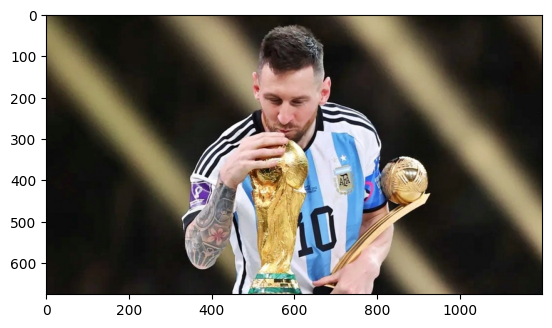

[[ 30.62496906  27.7980621   22.10070734]
 [207.83661226 202.47888259 202.50844696]
 [148.5124161  132.54424563 102.95095982]]


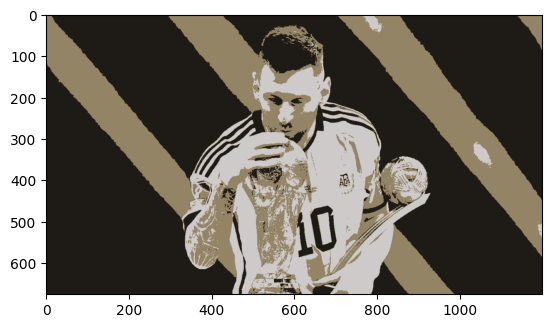

Image saved as img1_compressed.png and img1_compressed.pdf


In [118]:
# Call main function
main()